![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## –í —ç—Ç–æ–º —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏ –Ω–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Ä–µ–π—Ç–∏–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –≤¬†TripAdvisor


# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from itertools import combinations
from scipy.stats import ttest_ind
import statsmodels.api as sm
import scipy.stats as sst
from collections import Counter
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π —É–¥–æ–±–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from sklearn import metrics # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

filenames_list = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        filenames_list.append(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import os
print(os.listdir("/kaggle/working"))

/kaggle/input/world-cities-database/LICENSE.txt
/kaggle/input/world-cities-database/worldcitiespop.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/countries-travel-inbound-dataset-19952018/global_travel_inbound.xls
/kaggle/input/countries-travel-inbound-dataset-19952018/china_outbound.xlsx
/kaggle/input/world-cities/worldcities.csv
['__notebook__.ipynb']


In [2]:
cities_pop_filename = '/kaggle/input/world-cities/worldcities.csv'
cities_pop_filename

'/kaggle/input/world-cities/worldcities.csv'

In [3]:
# –≤—Å–µ–≥–¥–∞ —Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ RANDOM_SEED, —á—Ç–æ–±—ã –≤–∞—à–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã!
RANDOM_SEED = 42

In [4]:
# –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –≤–µ—Ä—Å–∏—é –ø–∞–∫–µ—Ç–æ–≤, —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã:
!pip freeze > requirements.txt

In [5]:
# –ó–∞–≤–µ—Ä–Ω–µ–º –º–æ–¥–µ–ª—å –≤ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –±—ã–ª–æ —É–¥–æ–±–Ω–µ–µ –≤—ã–∑—ã–≤–∞—Ç—å

def model_func(df_preproc):
    # –≤—ã–¥–µ–ª–∏–º —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å
    train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
    test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

    y = train_data.Rating.values            # –Ω–∞—à —Ç–∞—Ä–≥–µ—Ç
    X = train_data.drop(['Rating'], axis=1)
    
    RANDOM_SEED = 42
    
    # –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ train_test_split –¥–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    # –≤—ã–¥–µ–ª–∏–º 20% –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é (–ø–∞—Ä–∞–º–µ—Ç—Ä test_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

    # –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å (–ù–ê–°–¢–†–û–ô–ö–ò –ù–ï –¢–†–û–ì–ê–ï–ú)
    model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
    
    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
    model.fit(X_train, y_train)

    # –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y_pred
    y_pred = model.predict(X_test)
    
    result = metrics.mean_absolute_error(y_test, y_pred)
    
    # –≤ RandomForestRegressor –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã–≤–µ—Å—Ç–∏ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
    plt.rcParams['figure.figsize'] = (10,10)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(15).plot(kind='barh')
    
    plt.show
    
    return result

# DATA

In [6]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

# –í–ê–ñ–ù–û! –¥—Ä—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Å–µ—Ç
df_train['sample'] = 1 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç—Ä–µ–π–Ω
df_test['sample'] = 0 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç–µ—Å—Ç
df_test['Rating'] = 0 # –≤ —Ç–µ—Å—Ç–µ —É –Ω–∞—Å –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è Rating, –º—ã –µ–≥–æ –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø–æ —ç—Ç–æ–º—É –ø–æ–∫–∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏

data = df_test.append(df_train, sort=False).reset_index(drop=True) # –æ–±—ä–µ–¥–∏–Ω—è–µ–º
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [7]:
sample_submission

Restaurant_id  Rating
0             id_0     2.0
1             id_1     2.5
2             id_2     4.0
3             id_3     1.0
4             id_4     4.0
...            ...     ...
9995       id_9995     3.0
9996       id_9996     1.5
9997       id_9997     4.5
9998       id_9998     1.0
9999       id_9999     2.5

[10000 rows x 2 columns]

–ü–æ–¥—Ä–æ–±–Ω–µ–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
* City: –ì–æ—Ä–æ–¥ 
* Cuisine Style: –ö—É—Ö–Ω—è
* Ranking: –†–∞–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —ç—Ç–æ–º –≥–æ—Ä–æ–¥–µ
* Price Range: –¶–µ–Ω—ã –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ –≤ 3 –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö
* Number of Reviews: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
* Reviews: 2 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –æ—Ç–∑—ã–≤–∞ –∏ –¥–∞—Ç—ã —ç—Ç–∏—Ö –æ—Ç–∑—ã–≤–æ–≤
* URL_TA: —Å—Ç—Ä–∞–Ω–∏—Ü–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –Ω–∞ 'www.tripadvisor.com' 
* ID_TA: ID —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –≤ TripAdvisor
* Rating: –†–µ–π—Ç–∏–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, —Å–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

## 1. –û–±—Ä–∞–±–æ—Ç–∫–∞ NAN 

In [8]:
# –æ–±—Ä–∞–±–æ—Ç–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü Number of Reviews
number_rew_nan = pd.isna(data['Number of Reviews']).astype('uint8')

number_rew_nan.name = 'number_rew_nan'
number_rew_nan.value_counts()

0    46800
1     3200
Name: number_rew_nan, dtype: int64

In [9]:
# –î–∞–ª–µ–µ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–ª–µ–º

#mean = data['Number of Reviews'].mean()
number_rew = data['Number of Reviews'].fillna(0)

number_rew.name = 'number_rew'
number_rew.sample(5)

16167     11.0
34787     10.0
38542    255.0
25165      4.0
13970    433.0
Name: number_rew, dtype: float64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.4253625733901515

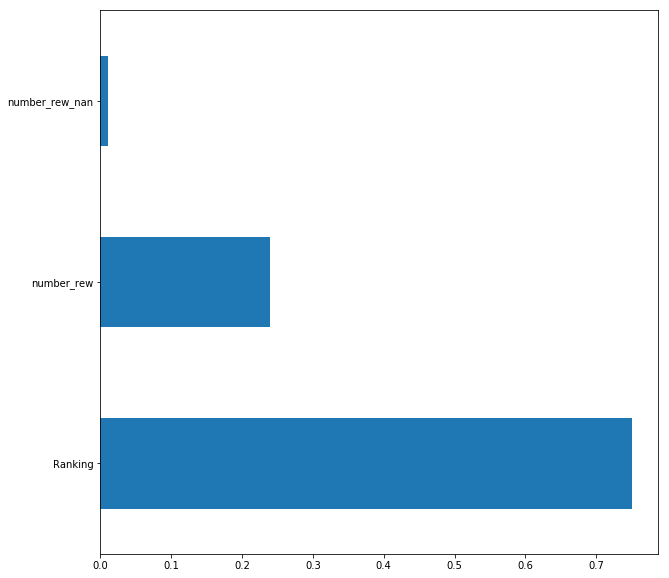

In [10]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –∏–º–µ—é—â–∏—Ö—Å—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –±–µ–∑ –æ–±—Ä–∞–±–æ—Ç–∫–∏

df_preproc = pd.concat([data.loc[:,['Rating', 'sample','Ranking']], number_rew, number_rew_nan], axis = 1)
model_func(df_preproc)

–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è - –±–æ–ª—å—à–æ–µ. –ü–æ–ø—Ä–æ–±—É–µ–º –ø—É—Ç–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É–ª—É—á—à–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [11]:
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –¥—Ä—É–≥–∏–µ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø–æ—ç—Ç–æ–º—É –ø–µ—Ä–µ–π–¥–µ–º –∫ —Å–ª–µ–¥—É—é—â–µ–º—É —à–∞–≥—É.

## 2. –°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–µ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [12]:
data['Number of Reviews'].fillna(0, inplace = True)

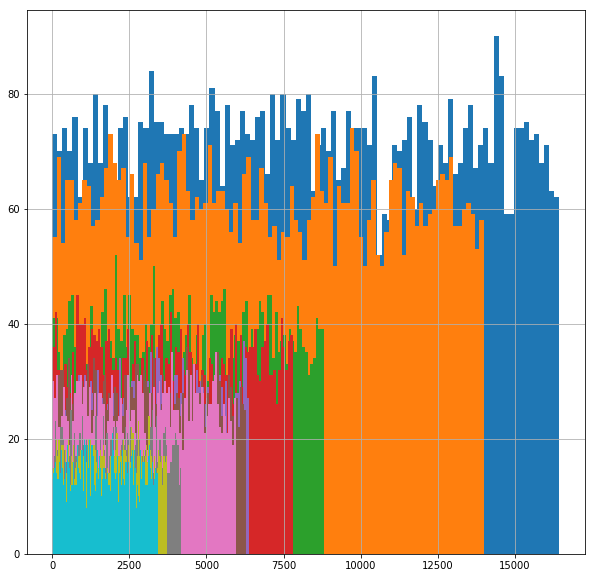

In [13]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–æ–ø 10 –≥–æ—Ä–æ–¥–æ–≤
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ Ranking –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –ø—Ä–æ—Å—Ç–æ –≤ –±–æ–ª—å—à–∏—Ö –≥–æ—Ä–æ–¥–∞—Ö –±–æ–ª—å—à–µ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤, –∏–∑-–∑–∞ –º—ã —ç—Ç–æ–≥–æ –∏–º–µ–µ–º —Å–º–µ—â–µ–Ω–∏–µ. 
–ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ—Ç —Ñ–∞–∫—Ç –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ Ranking.

In [14]:
data[data.City == 'London'].describe()

Ranking  Number of Reviews       sample       Rating
count   7193.000000        7193.000000  7193.000000  7193.000000
mean    8169.707354         129.816488     0.800361     3.165508
std     4723.964027         321.937972     0.399756     1.698275
min        1.000000           0.000000     0.000000     0.000000
25%     4101.000000           7.000000     1.000000     3.000000
50%     8092.000000          32.000000     1.000000     4.000000
75%    12282.000000         121.000000     1.000000     4.500000
max    16444.000000        9660.000000     1.000000     5.000000

In [15]:
data[(data.City == 'London') & (data.Rating == 5)].loc[:,['Number of Reviews', 'Ranking']].\
sort_values('Ranking', ascending = False).iloc[:10,]

Number of Reviews  Ranking
16133                0.0  16287.0
13461                0.0  16036.0
11848                0.0  15979.0
33140                3.0  15946.0
16891                2.0  15905.0
38037               62.0  15639.0
25991                2.0  15516.0
26424                5.0  13870.0
30616                5.0  13245.0
35566                5.0  13156.0

<Figure size 360x360 with 0 Axes>

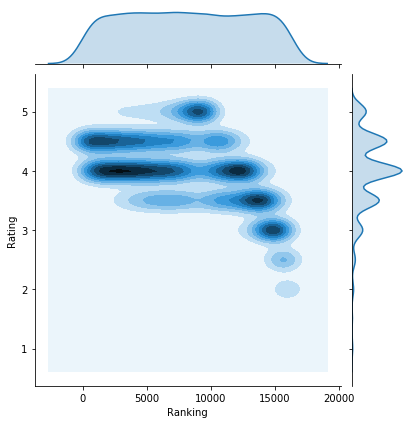

In [16]:
plt.figure(figsize = (5,5))
sns.jointplot(data = data[(data.City == 'London') & (data.Rating > 0)], x = 'Ranking', y = 'Rating', kind = 'kde')

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ä–µ—Å—Ç–æ—Ä–∞–Ω—ã (–º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π Ranking) –∏–º–µ—é—Ç Rating —Ä–∞–≤–Ω—ã–π –ø—Ä–∏–º–µ—Ä–Ω–æ 4 –±–∞–ª–ª–∞–º.
–ù–æ –µ—Å—Ç—å —Ä–µ—Å—Ç–æ—Ä–∞–Ω—ã —Å –≤—ã—Å–æ–∫–∏–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º 5, –Ω–æ –ø–æ —Ä–∞–Ω–∫—É —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –ø—Ä–∏–º–µ—Ä–Ω–æ –ø–æ—Å–µ—Ä–µ–¥–∏–Ω–µ. –≠—Ç–æ –±—É–¥–µ—Ç –≤–µ—Ä–Ω–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –ª–æ–∫–∞–ª—å–Ω–æ–π –∑–∞–±–µ–≥–∞–ª–æ–≤–∫–∏ –¥–ª—è –º–µ—Å—Ç–Ω—ã—Ö, –≤ –∫–æ—Ç–æ—Ä–æ–π –Ω–µ –º–Ω–æ–≥–æ –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–µ–π, –Ω–æ –∫–æ—Ç–æ—Ä—ã–µ –≤—Å–µ —Å—Ç–∞–≤—è—Ç –µ–π —Å—Ç–∞–±–∏–ª—å–Ω–æ 5.


In [17]:
# —Å–æ–∑–¥–∞–¥–∏–º –ø—Ä–∏–∑–Ω–∞–∫, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ Ranking –≤—ã—á–∏—Å–ª—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ Rating. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–∞—è
# f(1) = 5 –∏ f(n) = 1 –ø—Ä–∏ f(x) = k*x + b

max_rank_by_city = data.groupby(['City']).max().Ranking

def true_rating(row):
    return round(5 - 4*(1 - row['Ranking'])/(1 - max_rank_by_city[row['City']]),1)

data['rating_by_rank'] = data.apply(true_rating, axis = 1)
data['rating_by_rank'].sort_values()

24269    1.0
44463    1.0
8066     1.0
22943    1.0
41175    1.0
        ... 
1677     5.0
14046    5.0
8524     5.0
18447    5.0
40566    5.0
Name: rating_by_rank, Length: 50000, dtype: float64

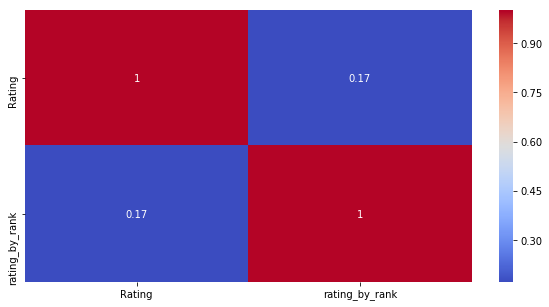

In [18]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax = sns.heatmap(data.loc[data.City == 'London',['Rating', 'rating_by_rank']].corr(),annot = True, cmap = 'coolwarm')

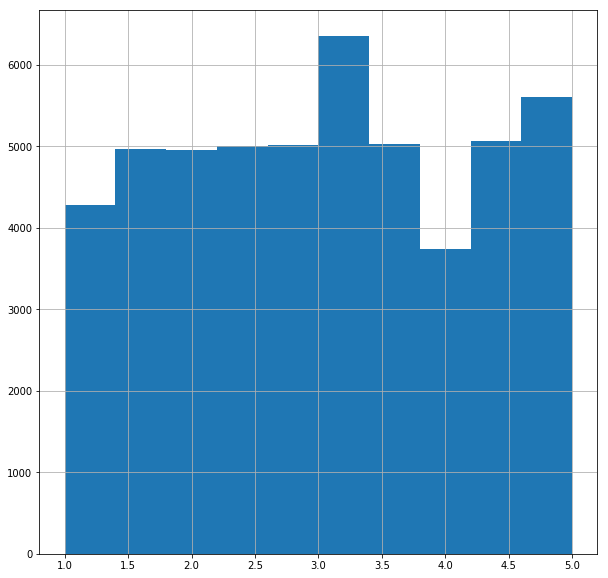

In [19]:
data['rating_by_rank'].hist()

–ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –∏–∑ Ranking –ø—É—Ç–µ–º –ª–∏–Ω. –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ = —Ä–∞–≤–Ω–æ–º–µ—Ä–µ–Ω –∏ –Ω–æ—Ä–º–∞–ª–µ–Ω.

In [20]:
data[(data.City == 'London') & (data.Rating == 5)].loc[:,['Number of Reviews', 'Ranking', 'rating_by_rank']].\
sort_values('Ranking', ascending = False).iloc[:20,]

Number of Reviews  Ranking  rating_by_rank
16133                0.0  16287.0             1.0
13461                0.0  16036.0             1.1
11848                0.0  15979.0             1.1
33140                3.0  15946.0             1.1
16891                2.0  15905.0             1.1
38037               62.0  15639.0             1.2
25991                2.0  15516.0             1.2
26424                5.0  13870.0             1.6
30616                5.0  13245.0             1.8
35566                5.0  13156.0             1.8
46968                4.0  12306.0             2.0
23870                4.0  10602.0             2.4
33379                6.0  10436.0             2.5
28706                8.0  10378.0             2.5
25213                4.0  10267.0             2.5
16280                4.0  10257.0             2.5
36127                4.0  10245.0             2.5
20042                4.0  10231.0             2.5
21382                6.0  10195.0             2.5
10787                4.0  10166.0             2.5

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.2651142784144529

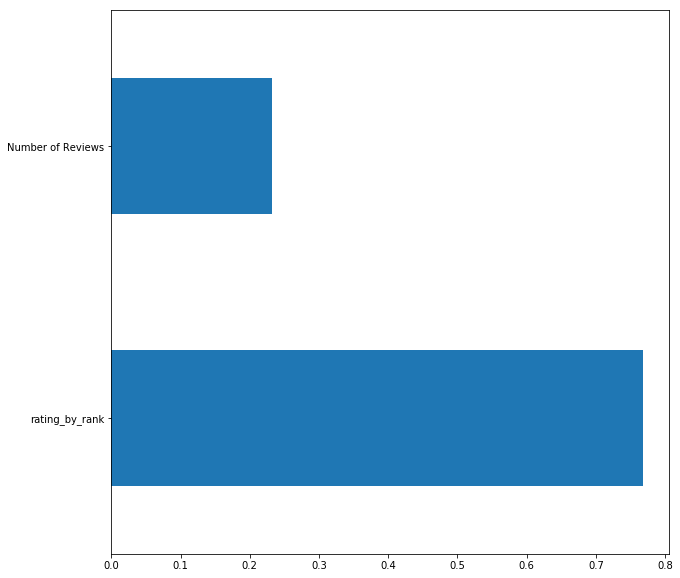

In [21]:
df_preproc = pd.concat([data.loc[:,['Number of Reviews','rating_by_rank']], data.loc[:,['Rating', 'sample']]], axis = 1)
model_func(df_preproc)

–ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ Ranking –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏–ª–æ—Å—å.

In [22]:
rating_by_rank = data['rating_by_rank']

In [23]:
data[data.City == 'London'].loc[:,['Number of Reviews', 'Ranking', 'rating_by_rank','Rating']].\
sort_values('rating_by_rank', ascending = True).iloc[:20,]

Number of Reviews  Ranking  rating_by_rank  Rating
9558                 0.0  16395.0             1.0     0.0
559                  0.0  16327.0             1.0     0.0
43981                0.0  16333.0             1.0     1.0
23494                0.0  16418.0             1.0     1.0
1839                 4.0  16292.0             1.0     0.0
43994                5.0  16296.0             1.0     1.0
46965                3.0  16308.0             1.0     1.0
3411                16.0  16250.0             1.0     0.0
35016                0.0  16435.0             1.0     1.0
36040                0.0  16386.0             1.0     1.0
15125                0.0  16312.0             1.0     1.0
7103                 3.0  16363.0             1.0     0.0
39405                3.0  16420.0             1.0     1.0
35545                0.0  16444.0             1.0     1.0
39375               16.0  16304.0             1.0     1.0
25383                2.0  16282.0             1.0     2.0
310                  2.0  16329.0             1.0     0.0
27383                2.0  16396.0             1.0     1.0
3149                 2.0  16293.0             1.0     0.0
35488               49.0  16248.0             1.0     2.0

In [24]:
# —Å–æ–∑–¥–∞–¥–∏–º –µ—â–µ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ Ranking, –ø—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫–æ–π —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ
# –ø—Ä–æ—Å—Ç–æ –ø–æ–¥–µ–ª–∏–º Ranking –Ω–∞ –º–∞–∫—Å. –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –≥–æ—Ä–æ–¥–µ

def norm_rank_funk(row):
    return round(row['Ranking']*100/max_rank_by_city[row['City']],5)

norm_rank = data.apply(norm_rank_funk, axis = 1)
norm_rank.name = 'norm_rank'
norm_rank.sort_values()

15936      0.00608
17199      0.01135
16194      0.01594
15441      0.01681
23446      0.02145
           ...    
25290    100.00000
22814    100.00000
49427    100.00000
17921    100.00000
14805    100.00000
Name: norm_rank, Length: 50000, dtype: float64

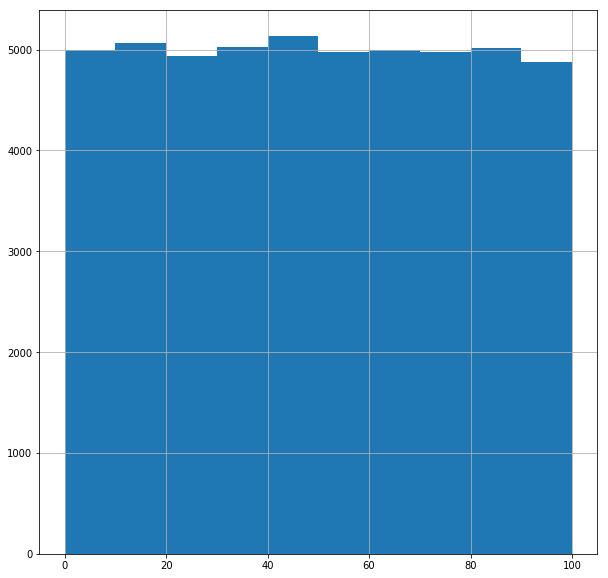

In [25]:
norm_rank.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c8e28dc50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c8e2ad550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c8e28d9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c8e2adf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c8e236240>],
 'means': []}

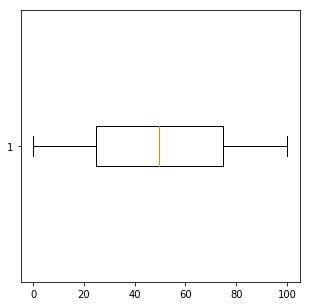

In [26]:
plt.figure(figsize = (5,5))
plt.boxplot(norm_rank, vert = False)

–ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Ç–∞–∫–∂–µ –Ω–µ –∏–º–µ–µ—Ç —Å–º–µ—â–µ–Ω–∏–π –∏ –≤—ã–±—Ä–æ—Å–æ–≤.
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.26845676190476186

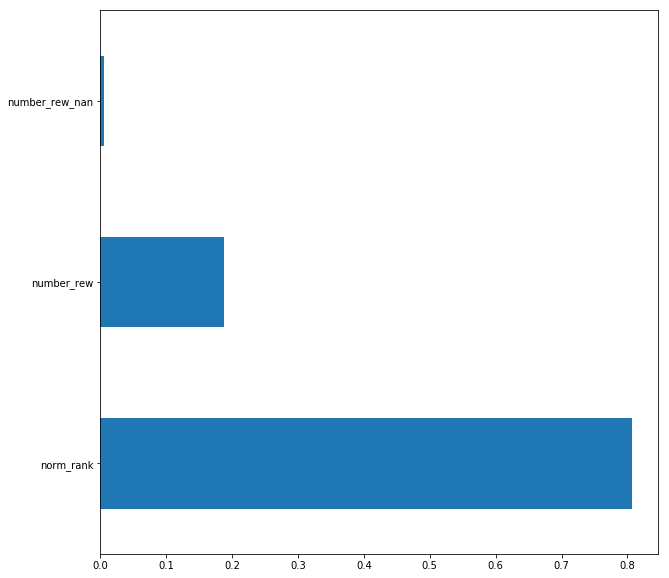

In [27]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], number_rew, number_rew_nan, norm_rank], axis = 1)
model_func(df_preproc)

–ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ –æ—Å–æ–±–æ –ø–æ–≤–ª–∏—è–ª –Ω–∞ –º–æ–¥–µ–ª—å. –û—Å—Ç–∞–≤–∏–º –¥–ª—è –º–æ–¥–µ–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ norm_rank.

In [28]:
# —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ –≥–æ—Ä–æ–¥–µ
mean_rews_by_city = round((data.groupby(['City']).sum()['Number of Reviews']
                           /data.groupby(['City']).max()['Ranking']),2)

mean_rews = data.City.apply(lambda x: mean_rews_by_city[x])
mean_rews.name = 'mean_rews'
mean_rews.sample(5)

18364     55.08
38922     25.83
46487     56.78
17848     54.15
22797    122.43
Name: mean_rews, dtype: float64

In [29]:
# –¥–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ –≥–æ—Ä–æ–¥–µ, –æ–¥–∏–Ω –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–∞–∫—Å Ranking, –¥—Ä—É–≥–æ–π –ø—Ä–æ—Å—Ç–æ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∑–∞–ø–∏—Å–µ–π –≤ –≥–æ—Ä–æ–¥–µ

max_rank = data.City.apply(lambda x: max_rank_by_city[x])
max_rank.name = 'max_rank'

places_counts_by_sity = data.groupby(['City']).count().Ranking
places_counts = data.City.apply(lambda x: places_counts_by_sity[x])
places_counts.name = 'places_counts'

pd.concat([max_rank, places_counts], axis = 1).sample(10)

max_rank  places_counts
28138    1766.0            745
39059    6372.0           2705
30879    3254.0           1372
20326    6275.0           2694
36852    2737.0           1186
14473    3254.0           1372
34544    2666.0           1126
22075    1137.0            488
5147     8809.0           3813
47604    2737.0           1186

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.207701875

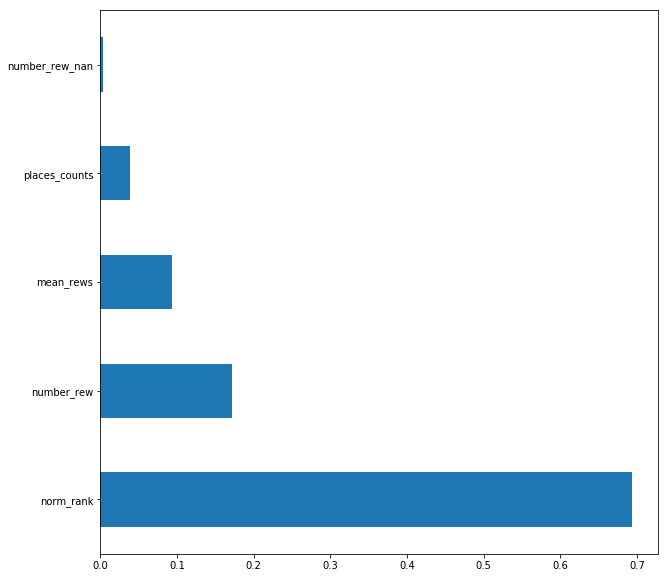

In [30]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], number_rew, number_rew_nan, norm_rank, mean_rews, places_counts], axis = 1)
model_func(df_preproc)

–ú–æ–¥–µ–ª—å —É–ª—É—á—à–∏–ª–∞—Å—å.

### –°–∫–ª–µ–∏–º –≤—Å–µ –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø–æ—Å–º–æ—Ç–∏—Ä–º –Ω–∞ –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

In [31]:
X = pd.concat([number_rew, norm_rank, rating_by_rank, mean_rews, places_counts, data['Rating']], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
number_rew        50000 non-null float64
norm_rank         50000 non-null float64
rating_by_rank    50000 non-null float64
mean_rews         50000 non-null float64
places_counts     50000 non-null int64
Rating            50000 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


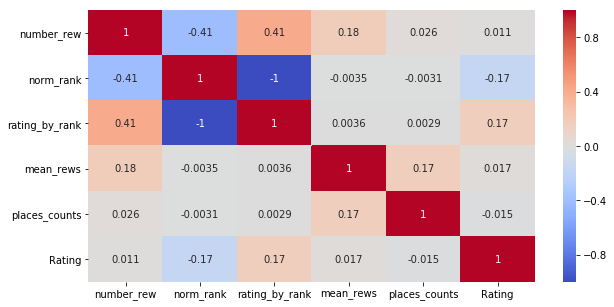

In [32]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax = sns.heatmap(X.corr(),annot = True, cmap = 'coolwarm')

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ norm_rank –∏ rating_by_rank –∏–º–µ—é—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é = -1, —Ç–∞–∫ –∫–∞–∫ –ø–æ–ª—É—á–µ–Ω—ã –æ–¥–∏–Ω –∏–∑ –¥—Ä—É–≥–æ–≥–æ –ø—É—Ç–µ–º –ª–∏–Ω–µ–π–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è.

## 3. –û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —É –Ω–∞—Å –º–æ–≥—É—Ç –±—ã—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    50000 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
rating_by_rank       50000 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.6+ MB


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫ City. –Ø–≤–ª—è–µ—Ç—Å—è –ª–∏ –æ–Ω –∑–Ω–∞—á–∏–º—ã–º –¥–ª—è –º–æ–¥–µ–ª–∏?

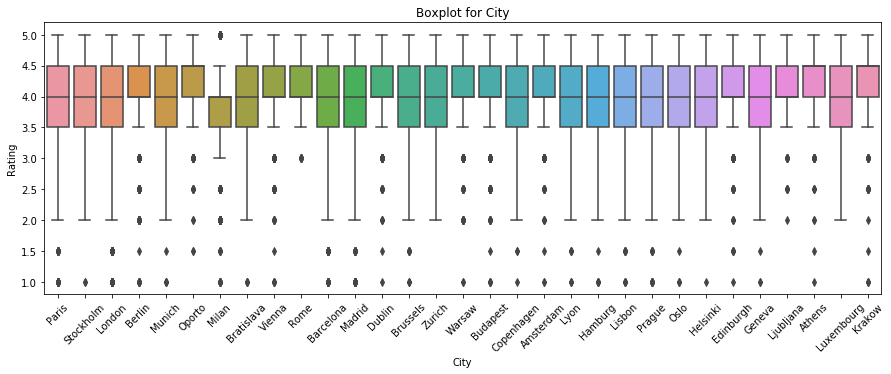

In [34]:
all_cities = data.City.value_counts().index

fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(x='City', y='Rating',data=data[data.Rating > 0],ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for City')

plt.show()

–ü—Ä–∏–∑–Ω–∞–∫, –æ—á–µ–≤–∏–¥–Ω–æ, –∑–Ω–∞—á–∏–º –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è Rating

In [35]:
# –≤—ã–¥–µ–ª–∏–º —Å–ø–∏—Å–æ–∫ —Å –≥–æ—Ä–æ–¥–∞–º–∏, –±–æ–∫—Å–ø–ª–æ—Ç—ã –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö
phen_cities = [ i for i in all_cities if data[data.City == i].quantile(q = 0.75).Rating - data[data.City == i].quantile(q = 0.25).Rating != 1.5]
phen_cities  

['Madrid',
 'Rome',
 'Brussels',
 'Lyon',
 'Stockholm',
 'Athens',
 'Oslo',
 'Bratislava',
 'Luxembourg',
 'Ljubljana']

### 3.1. –°–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–µ–º dummy-–ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ City

In [36]:
data.City.unique()

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

In [37]:
# —Å–æ–∑–¥–∞–¥–∏–º –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Å –≥–æ—Ä–æ–¥–∞–º–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–∫—Å–ø–ª–æ—Ç—ã –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

data['phen_cities'] = data.City.apply(lambda x: x if x in phen_cities else 'other')
data['phen_cities'].value_counts()

other         37996
Madrid         3813
Rome           2589
Brussels       1314
Lyon           1126
Stockholm      1033
Athens          776
Oslo            488
Bratislava      380
Luxembourg      263
Ljubljana       222
Name: phen_cities, dtype: int64

In [38]:
# –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è get_dummies

cities = pd.get_dummies(data.City, columns=[ 'City'])
cities.sample(5)

Amsterdam  Athens  Barcelona  Berlin  Bratislava  Brussels  Budapest  \
21096          0       0          0       1           0         0         0   
24540          0       0          0       0           0         0         0   
21155          0       0          0       0           0         0         0   
45066          0       0          0       0           0         0         0   
11528          0       0          0       0           0         0         0   

       Copenhagen  Dublin  Edinburgh  ...  Munich  Oporto  Oslo  Paris  \
21096           0       0          0  ...       0       0     0      0   
24540           0       0          0  ...       0       0     0      0   
21155           0       0          0  ...       0       0     0      0   
45066           0       0          0  ...       0       0     0      1   
11528           0       0          0  ...       0       0     0      1   

       Prague  Rome  Stockholm  Vienna  Warsaw  Zurich  
21096       0     0          0       0       0       0  
24540       0     0          0       0       0       0  
21155       0     0          0       0       0       0  
45066       0     0          0       0       0       0  
11528       0     0          0       0       0       0  

[5 rows x 31 columns]

In [39]:
phen_cities_dummy = pd.get_dummies(data.phen_cities, columns=[ 'phen_cities'])
phen_cities_dummy.sample(5)

Athens  Bratislava  Brussels  Ljubljana  Luxembourg  Lyon  Madrid  \
6432        0           0         0          0           0     0       0   
9014        0           0         0          0           0     0       0   
12240       0           0         0          0           0     0       0   
33215       0           0         0          0           0     0       1   
7036        0           0         0          0           0     0       0   

       Oslo  Rome  Stockholm  other  
6432      0     0          0      1  
9014      0     0          0      1  
12240     0     0          0      1  
33215     0     0          0      0  
7036      0     0          0      1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.20698124999999998

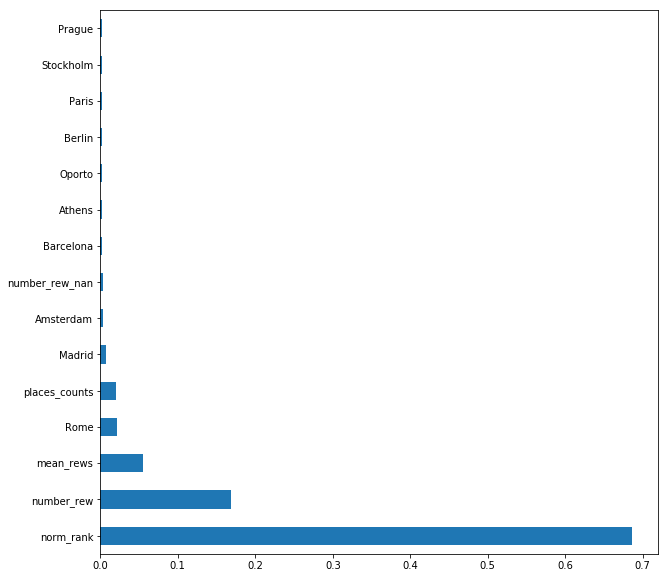

In [40]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –¥–∞–º–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –º–æ–¥–µ–ª–∏

df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities], axis = 1)
model_func(df_preproc)

–ú–æ–¥–µ–ª—å –¥–∞–µ—Ç –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –≤—Å–µ—Ö –≥–æ—Ä–æ–¥–∞—Ö. –û—Å—Ç–∞–≤–∏–º –¥–ª—è –º–æ–¥–µ–ª–∏ cities

### 3.2. –û–±—Ä–∞–±–æ—Ç–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫ "Price Range".

In [41]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [42]:
data['Price Range'].isna().sum()

17361

In [43]:
# –ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Ü–µ–Ω–µ –º–Ω–æ–≥–æ. –í—ã–¥–µ–ª–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Ü–µ–Ω–µ –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫

price_isnan = pd.isna(data['Price Range']).astype('uint8')
price_isnan.name = 'price_isnan'

In [44]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è Price Range

def price_ordinal(price):
    if price == '$':
        result = 1
    elif price == '$$ - $$$':
        result = 2
    elif price == '$$$$':
        result = 3
    else:
        result = 0
    return result

prices = data['Price Range'].apply(price_ordinal)
prices.name = 'prices'

prices.value_counts()

2    23041
0    17361
1     7816
3     1782
Name: prices, dtype: int64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.204948125

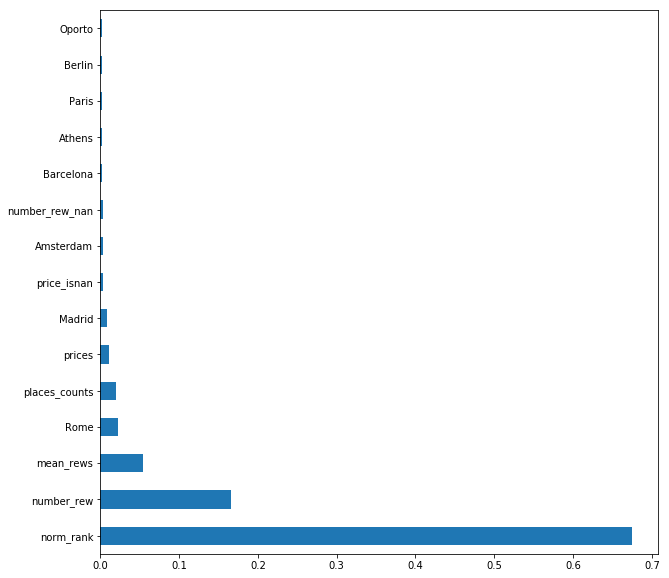

In [45]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –º–æ–¥–µ–ª—å —Å –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–π —Ü–µ–Ω–æ–π

df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan], axis = 1)
model_func(df_preproc)

### 3.3. –û–±—Ä–∞–±–æ—Ç–∞–µ–º Cuisine Style

In [46]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ —Å—Ç–∏–ª–µ–π –∫—É—Ö–Ω–∏ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –¥–∞—Ç–∞—Å–µ—Ç–µ

cuisine_styles = Counter()

for i in data['Cuisine Style'].dropna():
    l = re.sub('\s\'|\'','', i)[1:-1].split(',')
    cuisine_styles.update(l)

cuisines = [x[0] for x in cuisine_styles.most_common()]

len(cuisines)


125

In [47]:
cuisine_styles.most_common()

[('Vegetarian Friendly', 14021),
 ('European', 12561),
 ('Mediterranean', 7820),
 ('Italian', 7433),
 ('Vegan Options', 5684),
 ('Gluten Free Options', 5185),
 ('Bar', 4094),
 ('French', 3970),
 ('Asian', 3786),
 ('Pizza', 3502),
 ('Spanish', 3456),
 ('Pub', 3058),
 ('Cafe', 2883),
 ('Fast Food', 2122),
 ('British', 1992),
 ('International', 1966),
 ('Seafood', 1878),
 ('Japanese', 1860),
 ('Central European', 1727),
 ('American', 1642),
 ('Sushi', 1450),
 ('Chinese', 1446),
 ('Portuguese', 1385),
 ('Indian', 1328),
 ('Middle Eastern', 980),
 ('Thai', 923),
 ('Wine Bar', 877),
 ('German', 820),
 ('Halal', 773),
 ('Greek', 768),
 ('Healthy', 758),
 ('Fusion', 748),
 ('Czech', 745),
 ('Steakhouse', 729),
 ('Barbecue', 710),
 ('Contemporary', 652),
 ('Soups', 630),
 ('Eastern European', 629),
 ('Vietnamese', 622),
 ('Grill', 617),
 ('Gastropub', 608),
 ('Turkish', 574),
 ('Mexican', 572),
 ('South American', 490),
 ('Delicatessen', 473),
 ('Austrian', 462),
 ('Polish', 453),
 ('Scandinavi

In [48]:
cuisine_most_common = [x[0] for x in cuisine_styles.most_common()[:10]]
cuisine_most_common

['Vegetarian Friendly',
 'European',
 'Mediterranean',
 'Italian',
 'Vegan Options',
 'Gluten Free Options',
 'Bar',
 'French',
 'Asian',
 'Pizza']

In [49]:
# –ø—Ä–µ–≤—Ä–∞—Ç–∏–º Cuisine Style –≤ —Å–ø–∏—Å–æ–∫

cuisine_style = data['Cuisine Style'].apply(lambda x: ['other_style'] if pd.isnull(x) else x[1:-1].split(',') )
cuisine_style.sample(5)

5472                                         [other_style]
28928                                ['Chinese',  'Asian']
12149                                        [other_style]
29639                          ['Mediterranean',  'Greek']
24869    ['Italian',  'French',  'Mediterranean',  'Eur...
Name: Cuisine Style, dtype: object

In [50]:
# –¥–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ö–æ–Ω—å –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ"

cuisine_counts = cuisine_style.apply(lambda x: len(x))
cuisine_counts.name = 'cuisine_counts'

cuisine_counts.sample(5)

17809    4
4650     3
27823    1
17375    2
43993    1
Name: cuisine_counts, dtype: int64

–ò–∑–º–µ–Ω–∏–º —Å—Ç–æ–ª–±–µ—Ü Cuisine Style —Ç–∞–∫: –µ—Å–ª–∏ —Å—Ç–∏–ª—å –∫—É—Ö–Ω–∏ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –ø–æ–ø–∞–¥–∞–µ—Ç –≤ —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —Ç–æ –æ—Å—Ç–∞–≤–ª—è–µ–º –µ–≥–æ, –µ—Å–ª–∏ –Ω–µ—Ç, –º–µ–Ω—è–µ–º –Ω–∞ other_style

In [51]:
for i,k in enumerate(cuisine_style):
    new_list = []
    for j in k:
        j = re.sub('\s\'|\'','', j)
        if j in cuisine_most_common:
            new_list.append(j)
        else:
            new_list.append('other_style')
    cuisine_style.at[i] = new_list
cuisine_style.sample(5)

20899                                        [other_style]
11109                      [Bar, other_style, other_style]
17594    [Italian, other_style, other_style, Mediterran...
3545                                         [other_style]
14197    [other_style, other_style, Asian, Vegetarian F...
Name: Cuisine Style, dtype: object

–¢–µ–ø–µ—Ä—å –¥–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É—é—â–∏–µ —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º —Å—Ç–∏–ª–µ–π –∫—É—Ö–æ–Ω—å

In [52]:
cuisine_style_df = pd.DataFrame(cuisine_style)
for i in cuisine_most_common + ['other_style']:
    cuisine_style_df[i] = cuisine_style.apply(lambda x: 1 if i in x else 0).astype('uint8')

cuisine_style_df.drop('Cuisine Style', axis = 1, inplace=True)

cuisine_style_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Vegetarian Friendly    50000 non-null uint8
European               50000 non-null uint8
Mediterranean          50000 non-null uint8
Italian                50000 non-null uint8
Vegan Options          50000 non-null uint8
Gluten Free Options    50000 non-null uint8
Bar                    50000 non-null uint8
French                 50000 non-null uint8
Asian                  50000 non-null uint8
Pizza                  50000 non-null uint8
other_style            50000 non-null uint8
dtypes: uint8(11)
memory usage: 537.2 KB


In [53]:
cuisine_style_df.sample(5)

Vegetarian Friendly  European  Mediterranean  Italian  Vegan Options  \
15655                    0         0              0        1              0   
35112                    1         0              0        0              1   
49755                    0         0              0        0              0   
46826                    0         0              0        0              0   
9698                     0         0              0        0              0   

       Gluten Free Options  Bar  French  Asian  Pizza  other_style  
15655                    0    0       0      0      0            1  
35112                    0    0       0      1      0            1  
49755                    0    0       0      0      0            1  
46826                    0    0       1      0      0            0  
9698                     0    0       0      0      0            1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.20366249999999997

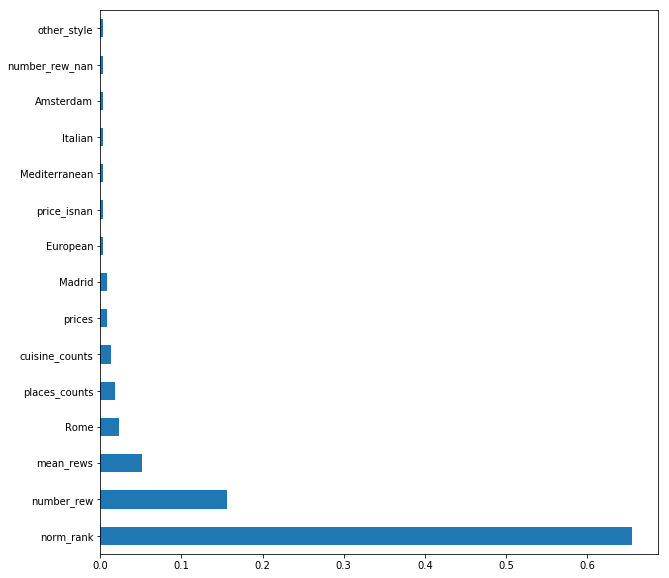

In [54]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df], axis = 1)
model_func(df_preproc)

In [55]:
data['Cuisine Style'].isna().sum()

11590

In [56]:
data['Cuisine Style'].fillna('other_style', inplace = True)

### 3.4. –¢–µ–ø–µ—Ä—å –æ–±—Ä–∞–±–æ—Ç–∞–µ–º Reviews
–í—ã–¥–µ–ª–∏–º –¥–∞—Ç—ã –æ–±–∑–æ—Ä–æ–≤ –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º, —Å–∫–æ–ª—å–∫–æ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ—à–ª–æ –º–µ–∂–¥—É –¥–≤—É–º—è –æ–±–∑–æ—Ä–∞–º–∏

In [57]:
data['rew_dates'] = data.Reviews.apply(lambda x : [0] if pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split("', '"))
data['max_rew_date'] = pd.to_datetime(data['rew_dates'].apply(lambda x: max(x)))

data['first_rew'] = pd.to_datetime(data['rew_dates'].apply(lambda x : x[0]))
data['second_rew'] = pd.to_datetime(data['rew_dates'].apply(lambda x: x[1] if len(x) == 2 else ''))

rew_delta = np.abs(data['first_rew'] - data['second_rew'])
rew_delta = rew_delta.apply(lambda x: x.days)

rew_delta.name = 'rew_delta'

rew_delta.sample(5)

38365    196.0
48275     18.0
3338       3.0
22083    165.0
24787      NaN
Name: rew_delta, dtype: float64

In [58]:
rew_delta.isna().sum()

13794

–ü—Ä–æ–ø—É—Å–æ–∫–≤ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, –≤—ã–¥–µ–ª–∏–º –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –Ω–∏—Ö

In [59]:
# –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –º–Ω–æ–≥–æ, —Å–¥–µ–ª–∞–µ–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è NAN
rew_delta_isnan = pd.isna(rew_delta).astype('uint8')

rew_delta_isnan.value_counts()

0    36206
1    13794
Name: rew_delta, dtype: int64

In [60]:
# –ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º

mean = round(rew_delta.mean(), 2)
rew_delta = rew_delta.fillna(mean)
rew_delta.sample(5)

39110    270.0
33657      7.0
18507     26.0
36871     23.0
15779    174.0
Name: rew_delta, dtype: float64

–°–æ–∑–¥–∞–¥–∏–º –µ—â–µ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –¥–∞—Ç—ã: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π, –ø—Ä–æ—à–µ–¥—à–µ–µ –º–µ–∂–¥—É —Ç–µ–∫—É—â–µ–π –¥–∞—Ç–æ–π –∏ –ø–æ—Å–ª–µ–¥–Ω–∏–º –æ—Ç–∑—ã–≤–æ–º

In [61]:
from datetime import datetime

rew_delta_cur = (datetime.now() - data['max_rew_date'])
rew_delta_cur = rew_delta_cur.fillna(rew_delta_cur.median())

rew_delta_cur = rew_delta_cur.apply(lambda x : x.days)

rew_delta_cur.name = 'rew_delta_cur'

rew_delta_cur.sample(5)

3805     1585
10741    1219
21855    1162
43071    1137
31077    1815
Name: rew_delta_cur, dtype: int64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.198221875

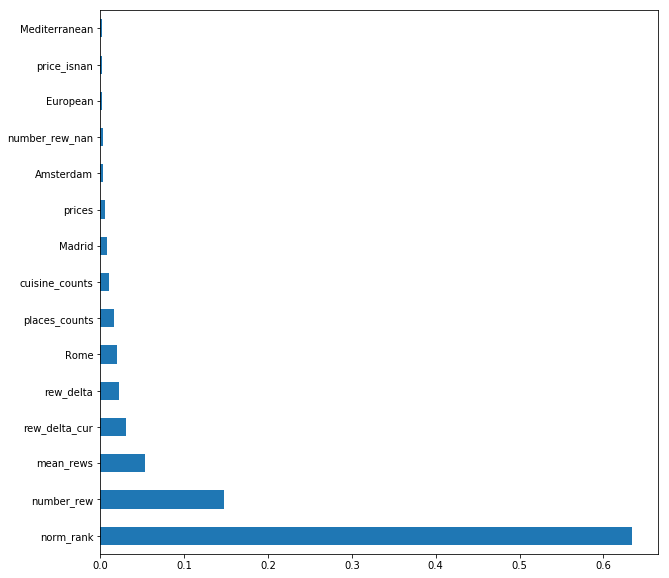

In [62]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df, \
                        rew_delta, rew_delta_cur,rew_delta_isnan], axis = 1)
model_func(df_preproc)

### 3.5. –°–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–µ–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ "–ù–∞—Å–µ–ª–µ–Ω–∏–µ –≥–æ—Ä–æ–¥–∞" –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤–Ω–µ—à–Ω–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [63]:
data_add = pd.read_csv(cities_pop_filename)
data_add.sample(3)

city    city_ascii      lat      lng        country iso2 iso3  \
2050          Kovin         Kovin  44.7482  20.9766         Serbia   RS  SRB   
9156   Prairie View  Prairie View  30.0850 -95.9897  United States   US  USA   
11385   Mooresville   Mooresville  39.6038 -86.3674  United States   US  USA   

      admin_name capital  population          id  
2050       Kovin   admin         NaN  1688830508  
9156       Texas     NaN      6391.0  1840021698  
11385    Indiana     NaN      9641.0  1840009668

In [64]:
cities_info = pd.DataFrame(data.City.value_counts().index)
cities_info.columns = ['city']
cities_info.head(3)

city
0  London
1   Paris
2  Madrid

In [65]:
data_europe = data_add[data_add.iso2.apply(lambda x: x not in ('US','CA','VE'))]
data_europe.head()

city   city_ascii      lat      lng country iso2 iso3   admin_name  \
0    Malishev√´    Malisheve  42.4822  20.7458  Kosovo   XK  XKS    Malishev√´   
1      Prizren      Prizren  42.2139  20.7397  Kosovo   XK  XKS      Prizren   
2  Zubin Potok  Zubin Potok  42.9144  20.6897  Kosovo   XK  XKS  Zubin Potok   
3     Kamenic√´     Kamenice  42.5781  21.5803  Kosovo   XK  XKS     Kamenic√´   
4         Viti         Viti  42.3214  21.3583  Kosovo   XK  XKS         Viti   

  capital  population          id  
0   admin         NaN  1901597212  
1   admin         NaN  1901360309  
2   admin         NaN  1901608808  
3   admin         NaN  1901851592  
4   admin         NaN  1901328795

In [66]:
cities_country = cities_info.merge(data_europe, how = 'left', on = 'city').loc[:, ['city', 'iso2']]
cities_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
city    31 non-null object
iso2    27 non-null object
dtypes: object(2)
memory usage: 744.0+ bytes


In [67]:
cities_country[cities_country.iso2.isna()]

city iso2
19  Copenhagen  NaN
22      Zurich  NaN
23      Oporto  NaN
25      Krakow  NaN

In [68]:
cities_country.at[23,'iso2'] = 'PT'
cities_country.at[25,'iso2'] = 'PL'
cities_country.at[22,'iso2'] = 'CH'
cities_country.at[19,'iso2'] = 'DK'
cities_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
city    31 non-null object
iso2    31 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [69]:
cities_info = cities_info.merge(data_europe.loc[:,['city','capital', 'population']], how = 'left', on = 'city')
cities_info.sample(5)

city  capital  population
28  Bratislava  primary    423737.0
6         Rome  primary   3339000.0
15   Stockholm  primary   1264000.0
5        Milan    admin   2945000.0
20      Athens  primary   3242000.0

In [70]:
cities_info.isna().sum()

city          0
capital       4
population    4
dtype: int64

In [71]:
cities_info['capital'] = cities_info.capital.fillna('not_cap')

In [72]:
cities_info[cities_info.population.isna()]

city  capital  population
19  Copenhagen  not_cap         NaN
22      Zurich  not_cap         NaN
23      Oporto  not_cap         NaN
25      Krakow  not_cap         NaN

In [73]:
# –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –Ω–∞—Å–µ–ª–µ–Ω–∏–∏ –∏ —Å—Ç—Ä–∞–Ω–∞—Ö
cities_info.at[23,'population'] = 237591
cities_info.at[25,'population'] = 769498
cities_info.at[22,'population'] = 428737
cities_info.at[19,'population'] = 615993

In [74]:
cities_info.columns =  ['City', 'capital', 'population']
cities_country.columns = ['City', 'country']

In [75]:
# –æ–±—ä–µ–¥–∏–Ω–∏–º —Å –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–æ–º

cities_pop = data.loc[:,['City']].merge(cities_info, how = 'left', on = 'City')

cities_pop.drop(['City'], axis = 1, inplace = True)

cities_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
capital       50000 non-null object
population    50000 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [76]:
cities_capital = pd.get_dummies(cities_pop.capital)
cities_pop.drop(['capital'], axis = 1, inplace = True)

cities_capital.sample(5)

admin  not_cap  primary
48827      0        0        1
46926      0        1        0
6919       0        0        1
7613       0        0        1
35220      0        0        1

In [77]:
# –¥–æ–±–∞–≤–∏–º –¥–∞–º–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —Å—Ç—Ä–∞–Ω
countries = data.loc[:,['City']].merge(cities_country, how = 'left', on = 'City')

countries.drop(['City'], axis = 1, inplace = True)
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 1 columns):
country    50000 non-null object
dtypes: object(1)
memory usage: 781.2+ KB


In [78]:
countries = pd.get_dummies(countries)
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 22 columns):
country_AT    50000 non-null uint8
country_BE    50000 non-null uint8
country_CH    50000 non-null uint8
country_CZ    50000 non-null uint8
country_DE    50000 non-null uint8
country_DK    50000 non-null uint8
country_ES    50000 non-null uint8
country_FI    50000 non-null uint8
country_FR    50000 non-null uint8
country_GB    50000 non-null uint8
country_GR    50000 non-null uint8
country_HU    50000 non-null uint8
country_IE    50000 non-null uint8
country_IT    50000 non-null uint8
country_LU    50000 non-null uint8
country_NL    50000 non-null uint8
country_NO    50000 non-null uint8
country_PL    50000 non-null uint8
country_PT    50000 non-null uint8
country_SE    50000 non-null uint8
country_SI    50000 non-null uint8
country_SK    50000 non-null uint8
dtypes: uint8(22)
memory usage: 1.4 MB


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.1976375

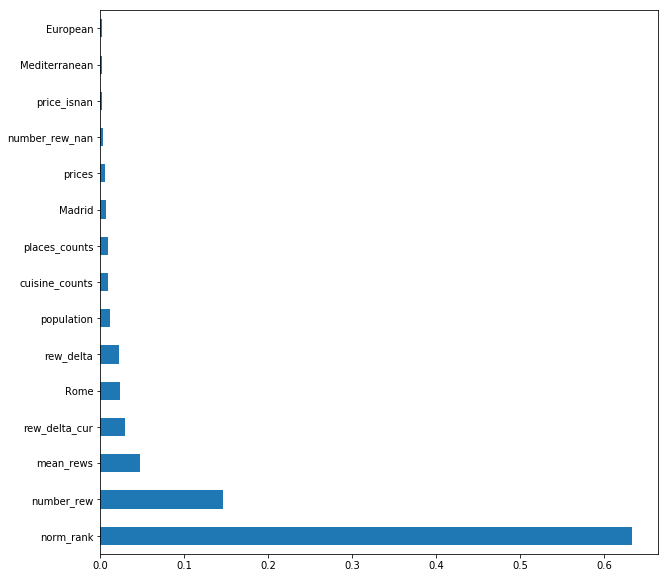

In [79]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df, \
                        rew_delta, rew_delta_cur,rew_delta_isnan, \
                        cities_pop, cities_capital, countries], axis = 1)
model_func(df_preproc)

### 3.6. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—É—Ä–∏—Å—Ç–æ–≤

In [80]:
cities_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
City          31 non-null object
capital       31 non-null object
population    31 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [81]:
cities_info['City']

0         London
1          Paris
2         Madrid
3      Barcelona
4         Berlin
5          Milan
6           Rome
7         Prague
8         Lisbon
9         Vienna
10     Amsterdam
11      Brussels
12       Hamburg
13        Munich
14          Lyon
15     Stockholm
16      Budapest
17        Warsaw
18        Dublin
19    Copenhagen
20        Athens
21     Edinburgh
22        Zurich
23        Oporto
24        Geneva
25        Krakow
26          Oslo
27      Helsinki
28    Bratislava
29    Luxembourg
30     Ljubljana
Name: City, dtype: object

In [82]:
# –∑–∞–≤–µ–¥–µ–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –≥–æ–æ—Ä–¥–æ–≤ —Å –Ω–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ [–∫–æ–ª-–≤–æ —Ç—ã—Å. —Ç—É—Ä–∏—Å—Ç–æ–≤, –º–µ—Å—Ç–æ –≤ —Ä–µ–π—Ç–µ–Ω–≥–µ –±–ª–∞–≥–æ—Å–æ—Å—Ç–æ—è–Ω–∏—è] –ø–æ –¥–∞–Ω–Ω—ã–º –∏–∑ wiki
th = {
    'London' : [19233, 14],
    'Paris' : [17560, 18],
    'Madrid' : [5440, 19],
    'Barcelona' : [6714, 19],
    'Berlin' : [5959, 15],
    'Milan' : [6481, 24],
    'Rome' : [10065, 24],
    'Prague' : [8949, 22],
    'Lisbon' : [3539, 29],
    'Vienna' : [6410, 2],
    'Amsterdam' : [8354, 7],
    'Brussels' : [3942, 13],
    'Hamburg' : [1450, 15],
    'Munich' : [4067, 15],
    'Lyon' : [6000, 18],
    'Stockholm' : [2605, 8],
    'Budapest' : [3823, 31],
    'Warsaw' : [2850, 27],
    'Dublin' : [5213, 16],
    'Copenhagen' : [3070, 5],
    'Athens' : [5728, 36],
    'Edinburgh' : [1660, 14],
    'Zurich' : [2240, 6],
    'Oporto' : [2341, 29],
    'Geneva' : [1150, 6],
    'Krakow' : [2732, 27],
    'Oslo' : [1400, 1],
    'Helsinki' : [1240, 9],
    'Bratislava' : [126, 26],
    'Luxembourg' : [1139, 11],
    'Ljubljana' : [5900, 20]
}

In [83]:
tourists = data.City.apply(lambda x : th[x][0])
tourists.name = 'tourists'

hapiness = data.City.apply(lambda x : th[x][1])
hapiness.name = 'hapiness'

tourists
hapiness

0        18
1         9
2        14
3        14
4        26
         ..
49995    24
49996    18
49997     8
49998    27
49999    24
Name: hapiness, Length: 50000, dtype: int64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.19719624999999996

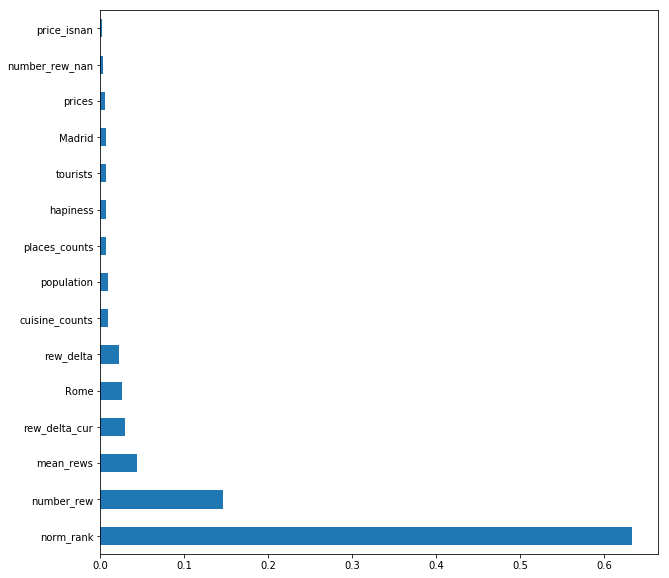

In [84]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df, \
                        rew_delta, rew_delta_cur,rew_delta_isnan, \
                        cities_pop, cities_capital, countries, \
                        tourists, hapiness], axis = 1)
model_func(df_preproc)

### 3.7. –ü–æ—Å—Ç—Ä–æ–∏–º –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–µ–∫—Å—Ç–æ–≤ –æ–±–∑–æ—Ä–æ–≤ –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [85]:
# –≤—ã–¥–µ–ª–∏–º —Ç–µ–∫—Å—Ç –æ–±–∑–æ—Ä–æ–≤ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.
data['rew_texts'] = data.Reviews.apply(lambda x : '' if pd.isna(x) else x[2:-2].split('], [')[0])

rew_texts_list = data['rew_texts'].apply(lambda x : [''] if x == '' else x.split("', '"))

data['first_text'] = rew_texts_list.apply(lambda x : x[0][1:-1] if len(x) == 1 else x[0][1:] if len(x) == 2 else '')
data['second_text'] = rew_texts_list.apply(lambda x: x[1][:-1] if len(x) == 2 else '')

data.loc[:,['Reviews', 'rew_texts', 'first_text', 'second_text']].sample(5)

Reviews  \
11567  [['Something fishyüêüüê†', 'Bistro in middle of Sh...   
41640  [['Excellent food', 'Hidden gem in north londo...   
20459  [['Caters to Large Groups', 'Enjoyable'], ['10...   
15041  [['Soup for you', 'When our canteen fails, we ...   
6885   [['Dreadful Service, okay food', 'NIce Breakfa...   

                                               rew_texts  \
11567  'Something fishyüêüüê†', 'Bistro in middle of Shop...   
41640  'Excellent food', 'Hidden gem in north london ...   
20459              'Caters to Large Groups', 'Enjoyable'   
15041  'Soup for you', 'When our canteen fails, we go...   
6885   'Dreadful Service, okay food', 'NIce Breakfast...   

                        first_text  \
11567            Something fishyüêüüê†   
41640               Excellent food   
20459       Caters to Large Groups   
15041                 Soup for you   
6885   Dreadful Service, okay food   

                                         second_text  
11567              Bistro in middle of Shopping Mall  
41640  Hidden gem in north london food is amazing...  
20459                                      Enjoyable  
15041             When our canteen fails, we go here  
6885             NIce Breakfast, but limited options

In [86]:
def rew_counts_func(row):
    result = 0 if row['rew_texts'] == ''  else 1 if row['second_text'] == '' else 2
    return result
    
rew_counts = data.apply(rew_counts_func, axis = 1)
rew_counts.name = 'rew_counts'

pd.concat([rew_counts, data['rew_texts']], axis = 1)

rew_counts                                          rew_texts
0               0                                                   
1               2   'Very good reviews!', 'Fine dining in Hakaniemi'
2               2               'Better than the Links', 'Ivy Black'
3               2        'Most exquisite', 'Delicious and authentic'
4               2  'Always the best in bratislava', 'Very good bu...
...           ...                                                ...
49995           2  'The real Italian experience!', 'Wonderful foo...
49996           2  'Parisian atmosphere', 'Bit pricey but interes...
49997           2  'Good by swedish standards', 'A hidden jewel i...
49998           2  'Underground restaurant', 'Oldest Restaurant i...
49999           2                      'Average', 'Nice an informal'

[50000 rows x 2 columns]

In [87]:
rew_counts.value_counts()

2    34787
0     8114
1     7099
Name: rew_counts, dtype: int64

In [88]:
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–∞—Ö

words_count = data['rew_texts'].apply(lambda x : len(x.split()))

words_count.name = 'words_count'
pd.concat([rew_counts, data['rew_texts'], words_count], axis = 1)

rew_counts                                          rew_texts  \
0               0                                                      
1               2   'Very good reviews!', 'Fine dining in Hakaniemi'   
2               2               'Better than the Links', 'Ivy Black'   
3               2        'Most exquisite', 'Delicious and authentic'   
4               2  'Always the best in bratislava', 'Very good bu...   
...           ...                                                ...   
49995           2  'The real Italian experience!', 'Wonderful foo...   
49996           2  'Parisian atmosphere', 'Bit pricey but interes...   
49997           2  'Good by swedish standards', 'A hidden jewel i...   
49998           2  'Underground restaurant', 'Oldest Restaurant i...   
49999           2                      'Average', 'Nice an informal'   

       words_count  
0                0  
1                7  
2                6  
3                5  
4                9  
...            ...  
49995            8  
49996            9  
49997           12  
49998            6  
49999            4  

[50000 rows x 3 columns]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.1968725

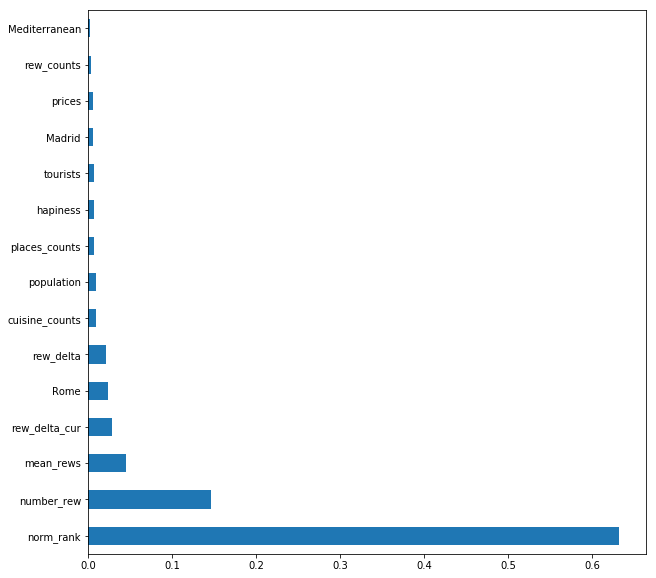

In [89]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df, \
                        rew_delta, rew_delta_cur,rew_delta_isnan, \
                        cities_pop, cities_capital, countries, \
                        tourists, hapiness, \
                        rew_counts], axis = 1)
model_func(df_preproc)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –º–æ–¥–µ–ª—å —É—Ö—É–¥—à–∏–ª–æ. –ê –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ - –Ω–∞–æ–±–æ—Ä–æ—Ç. –û—Å—Ç–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫ rew_counts

### 3.8. –ù–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ population, tourists –∏ Number of Reviews –ø–æ—Å—Ç—Ä–æ–∏–º –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

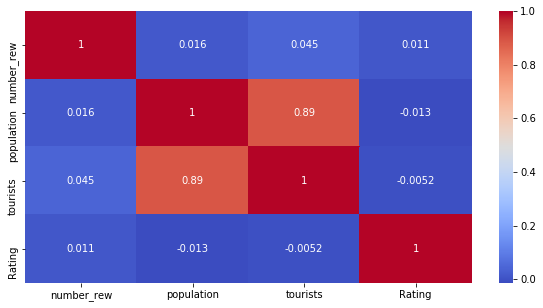

In [90]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

X = pd.concat([number_rew, cities_pop, tourists, data['Rating']], axis = 1)

fig, ax = plt.subplots(1,1, figsize = (10,5))
ax = sns.heatmap(X.corr(),annot = True, cmap = 'coolwarm')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—É—Ä–∏—Å—Ç–æ–≤ –∏ –Ω–∞—Å–µ–ª–µ–Ω–∏–µ –≥–æ—Ä–æ–¥–∞ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã.
–ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–ª–∞–≤–Ω—É—é –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—É –≤–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞.
–°–Ω–∞—á–∞–ª–∞ –Ω–æ—Ä–º–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏.

In [91]:
ss = StandardScaler()
cities_pop_std = pd.DataFrame(ss.fit_transform(cities_pop))
tourists_std = pd.DataFrame(ss.transform(pd.DataFrame(tourists)))

pd.concat([cities_pop_std,tourists_std], axis = 1).corr()

pop_tourists = cities_pop_std + tourists_std
pop_tourists = pd.DataFrame(ss.fit_transform(pop_tourists))

pop_tourists.name = 'pop_tourists'

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.1976025

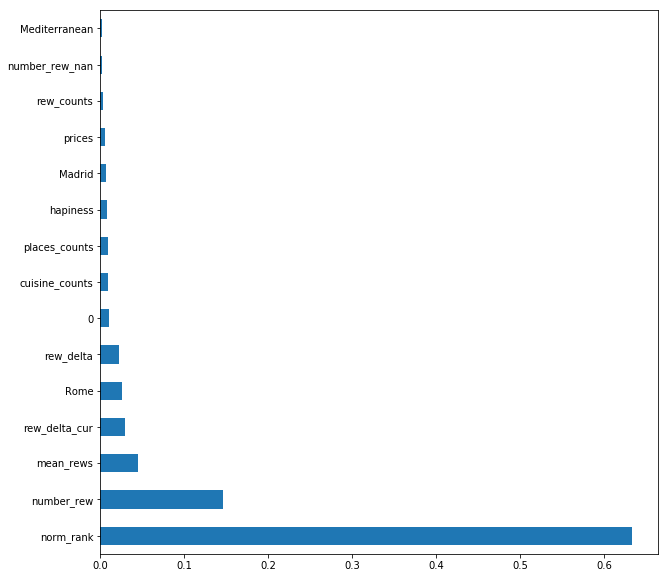

In [92]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df, \
                        rew_delta, rew_delta_cur,rew_delta_isnan, \
                        cities_capital, countries, \
                        hapiness, \
                        rew_counts, \
                        pop_tourists], axis = 1)
model_func(df_preproc)

–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–¥–µ–ª—å –Ω–µ —É–ª—É—á—à–∏–ª. –û—Å—Ç–∞–≤–∏–º –≤ –º–æ–¥–µ–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞—Å–µ–ª–µ–Ω–∏–µ –≥–æ—Ä–æ–¥–∞ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—É—Ä–∏—Å—Ç–æ–≤

# Final model test

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.1968725

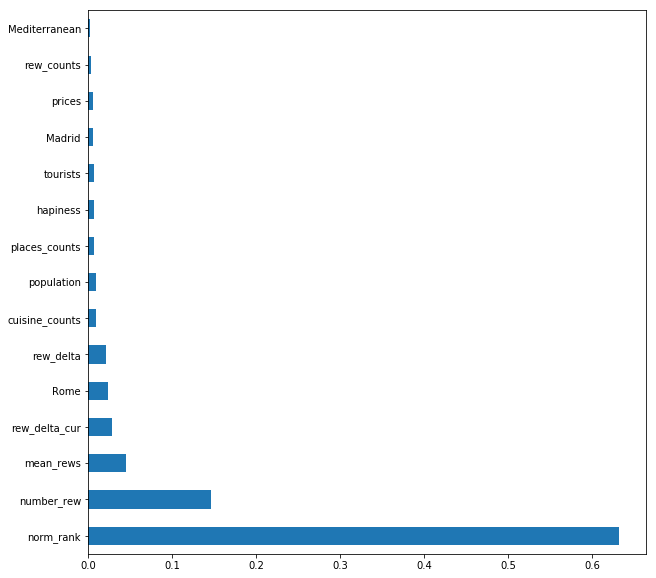

In [93]:
df_preproc = pd.concat([data.loc[:,['Rating', 'sample']], \
                        number_rew, number_rew_nan, norm_rank, mean_rews, places_counts, \
                        cities, prices, price_isnan, \
                        cuisine_counts, cuisine_style_df, \
                        rew_delta, rew_delta_cur,rew_delta_isnan, \
                        cities_pop, cities_capital, countries, \
                        tourists, hapiness, \
                        rew_counts], axis = 1)
model_func(df_preproc)

# Submission
–≥–æ—Ç–æ–≤–∏–º Submission –Ω–∞ –∫–∞–≥–ª

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE:  0.1656875


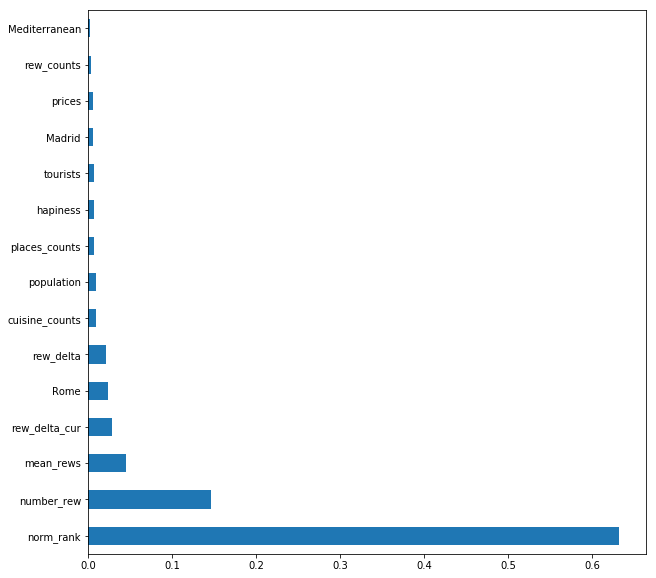

In [94]:
# –≤—ã–¥–µ–ª–∏–º —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # –Ω–∞—à —Ç–∞—Ä–≥–µ—Ç
X = train_data.drop(['Rating'], axis=1)
    
RANDOM_SEED = 42
    
# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ train_test_split –¥–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# –≤—ã–¥–µ–ª–∏–º 20% –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é (–ø–∞—Ä–∞–º–µ—Ç—Ä test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å (–ù–ê–°–¢–†–û–ô–ö–ò –ù–ï –¢–†–û–ì–ê–ï–ú)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
    
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
model.fit(X_train, y_train)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y_pred
y_pred = model.predict(X_test)

y_pred = np.round(y_pred * 2) / 2
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
    
# –≤ RandomForestRegressor –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã–≤–µ—Å—Ç–∏ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [95]:
test_data = test_data.drop(['Rating'], axis=1)
sample_submission.Rating

0       2.0
1       2.5
2       4.0
3       1.0
4       4.0
       ... 
9995    3.0
9996    1.5
9997    4.5
9998    1.0
9999    2.5
Name: Rating, Length: 10000, dtype: float64

–û–±—Ä–∞—Ç–∏–ª–∞ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ Rating –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ - –∑–∞–ø–æ–ª–Ω—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 1 –¥–æ 5 —Å —à–∞–≥–æ–º 0.5. –ü–æ—ç—Ç–æ–º—É, –µ—Å–ª–∏ –æ–∫—Ä—É–≥–ª–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–æ –±–ª–∏–∂–∞–π—à–µ–µ–≥–æ x.5 —á–∏—Å–ª–∞, —Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É–ª—É—á—à–∏—Ç—Å—è.

In [96]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [97]:
predict_submission = np.round(predict_submission * 2)/2

In [98]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission

Restaurant_id  Rating
0             id_0     3.0
1             id_1     4.0
2             id_2     4.5
3             id_3     4.5
4             id_4     4.5
...            ...     ...
9995       id_9995     4.5
9996       id_9996     4.0
9997       id_9997     3.0
9998       id_9998     4.5
9999       id_9999     4.5

[10000 rows x 2 columns]